<div align="center">
    <h1><strong>Proyecto Final</strong></h1>
    <h2>Juan David Argüello Plata</h2>
    <img src="Images/uis.png" style="width: 300px;" />
</div>

<div align="justify">
    El presente trabajo trata sobre el estudio temporal-dinámico que sufre un río cuando sortea un obstáculo; como una piedra, por ejemplo. 
</div>

<div align="center">
    <img src="Images/rio.jpg" style="width: 300px;" />
</div>
<div align="center">
    <i>Figura 1</i>. Río obstaculizado.
</div>

## __1. Geometría__

<div align="justify">
    La geometría de estudio se puede apreciar en la Figura 2.
</div>

<div align="center">
    <img src="Images/Geometry/Geometry.PNG" style="width: 600px;" />
</div>
<div align="center">
    <i>Figura 2</i>. Geometría.
</div>


In [1]:
from App.Data import *
data = Datos()
data

## __2. Ecuaciones de Navier-Stokes__

<div align="justify">
    Las ecuaciones de Navier-Stokes para flujo incompresible formado por las ecuaciones de velocidad $u$ y presión $p$ se pueden apreciar en la Ecuación \ref{stokes}.
    $$
    \begin{equation}
        \rho \left(\frac{\partial u}{\partial t} + u \cdot \nabla u \right) = \nabla \cdot \sigma (u,p) +f, \\
        \nabla \cdot u = 0
        \tag{1}
        \label{stokes}
    \end{equation}
    $$
    De la ecuación de momento (Ecuación \ref{stokes}), $f$ se refiere a la fuerza dada por unidad de volumen, $\sigma (u,p)$ se refiere al tensor de esfuerzos, que para un fluido newtoniano está dado por:
    $$
    \begin{equation}
        \sigma (u,p) = 2 \mu \epsilon (u) - p I 
        \tag{2}
        \label{sigma}
    \end{equation}
    $$
    Siendo $\epsilon$ el tensor de deformaciones.
    $$
    \begin{equation}
        \epsilon (u) = \frac{1}{2} \left(\nabla u + \left(\nabla u \right)^T \right)
        \tag{3}
        \label{epsilon}
    \end{equation}
    $$
    $\mu$ es la viscosidad dinámica.
</div>

## 2.1. Forma Variacional

<div align="justify">
    Para evitar solucionar el sistema de ecuaciones mediante precondicionadores y metodologías iterativas, se empleará un acercamiento matemático conocido como el <i>método de división</i>. Existen diferentes estrategias de división para flujo incompresible de las ecuaciones de Navier-Stokes, uno de ellos es el <i>método de Chorin</i> (IPCS). 
    <br>
    <br>
    Involucra tres etapas. En <u>primer lugar</u>, se propone una velocidad tentativa $u^*$ al emplear la ecuación de momento (\ref{stokes}) como una diferencia finita centrada en el tiempo, pero usando la presión $p^n$ del tiempo anterior. Además, se linealiza el el término convectivo no lineal al emplear la velocidad conocida $u^n$ del tiempo anterior $\left( u^n \cdot \nabla u^n \right)$.
    $$
    \begin{equation}
        \rho \left<\left(u^* - u^n \right) / \Delta t, v \right> + \left<\rho u^n \cdot \nabla u^n, v \right> + \left< \sigma \left(u^{n+\frac{1}{2}}, p^n \right), \epsilon (v) \right> \\
        + \left<p^n n, v \right> _{\partial \Omega} - \left<\mu \nabla u ^{n+\frac{1}{2} \cdot n, v} \right> _{\partial \Omega} = \left<f^{n+1}, v \right>
        \tag{4}
        \label{Chorin}
    \end{equation}
    $$
    De la Ecuación \ref{Chorin}, la notación $\left< v,w \right>$ se trata de lo siguiente:
    $$
    \begin{equation}
        \left< v,w \right> = \int _{\Omega} v w \, dx \\
        \left< v,w \right> _{\partial \Omega} = \int _{\partial \Omega} v w \, ds
        \tag{5}
        \label{nota}
    \end{equation}
    $$
    <br>
    $$
    \begin{equation}
        u^{n+\frac{1}{2}} \approx \frac{u^n + u^{n+1}}{2}
        \tag{6}
        \label{app}
    \end{equation}
    $$
    Se puede observar que el <i>problema variacional</i> (Ecuación \ref{Chorin}) surge de la integración por partes al término $\left<-\nabla \cdot \sigma , v \right>$; dónde:
    $$
    \begin{equation}
        \left<-\nabla \cdot \sigma , v \right> = \left< \sigma, \epsilon (v) \right> - \left< T, v \right> _{\partial \Omega}
        \tag{7}
        \label{al}
    \end{equation}
    $$
    Siendo $T=\sigma \cdot n$ la tracción límite. Si se resuelve el problema con una frontera libre, se puede tomar $T=0$. Sin embargo, si se calcula el flujo a través de un canal o tubería y se desea modelar un "canal imaginario" en la salida, se necesita tratar este término con sumo cuidado. Para este caso, se realizaría la suposición de que la derivada de la velocidad en la dirección del canal es cero a la salida (condición de frontera tipo <i>Neumann</i>), que corresponde a un flujo completamente desarrollado o que no cambia de manera significativa.
    <br>
    <br>
    En el <u>segundo paso</u>, se emplea la velocidad calculada para predecir el valor de la presión $P^n$:
    $$
    \begin{equation}
        \left< \nabla p ^{n+1}, \nabla q \right> = \left< \nabla p ^n, \nabla q \right> - \Delta t ^{-1} \left< \nabla \cdot u ^* , q \right>
        \tag{8}
        \label{PP}
    \end{equation}
    $$
    Dónde: $q$ es un función de prueba escalar del espacio de presión; mientras que $v$ es una función de prueba vectorial del campo de velocidades.
    <br>
    <br>
    Relacionando la Ecuación \ref{stokes}, \ref{Chorin} y \ref{PP}, se obtiene:
    $$
    \begin{equation}
       \frac{u^{n+1} - u^*}{\Delta t} + \nabla p^{n+1} - \nabla p ^n = 0
       \tag{9}
       \label{up}
    \end{equation}
    $$
    <u>Finalmente</u>, se calcula la velocidad corregida $u^{n+1}$ de la Ecuación \ref{up} al multiplicarla por la función de prueba $v$, obteniendo:
    $$
    \begin{equation}
        \left< u^{n+1} , v \right> = \left< u^* , v \right> - \Delta t \left< \nabla \left( p ^{n+1} - p^n \right) , v \right>
        \tag{10}
    \end{equation}
    $$
    En resumen, el sistema de ecuaciones de Navier - Stokes, para flujo incompresible, se resuelve a través de una secuencia de tres problemas variacionales lineales.
</div>

## __3. Perfil de velocidades__

<div align="justify">
    El perfil de velocidades inicial del río se supone como conocido y presenta el comportamiento descrito en la Ecuacón \ref{veloc}.
    $$
    \begin{equation}
        u(x,y,t) = \left(1.5 \cdot \frac{C y (h-y)}{h^2} , 0 \right)
        \tag{11}
        \label{veloc}
    \end{equation}
    $$
</div>

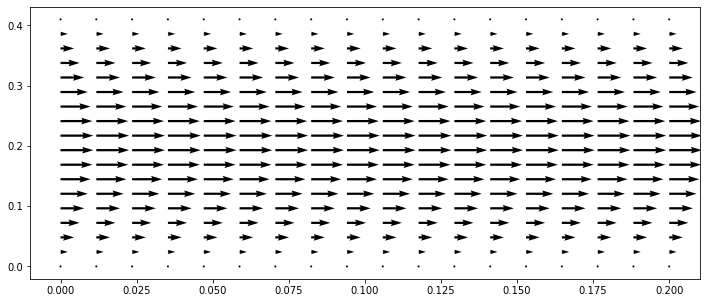

In [2]:
%matplotlib inline
from App.Read import Read
from App.Velocidades import Perfil
#Datos
datos = Read(data)
#Perfil de velocidades
Perfil(datos)

## __4. Malla__

<div align="justify">
    La malla de la geometría se crea ejecutando el siguiente código:
</div>

In [19]:
%matplotlib inline
from IPython.display import display
from ipywidgets import *
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt

datos = Read(data)
def malla(size=64):
    # Geometría y malla
    fig = plt.figure(figsize=(40,5))
    canal = Rectangle(Point(0,0), Point(datos['Geo']['l [m]'], datos['Geo']['h [m]']))
    piedra = Circle(Point(datos['Geo']['Ox [m]'], datos['Geo']['Oy [m]']), datos['Geo']['D [m]']/2)
    rio = canal - piedra
    mesh = generate_mesh(rio, size)
    mesha['malla'] = mesh
    plot(mesh)
mesha = {}
Esquema = interactive(malla,
                      size = IntSlider(value = 64, min=10, max= 120))
display(Esquema)

interactive(children=(IntSlider(value=64, description='size', max=120, min=10), Output()), _dom_classes=('widg…

## __5. Solución__

<div align="justify">
    La solución del problema de interés, con la malla especificada, se puede apreciar a continuación.
</div>

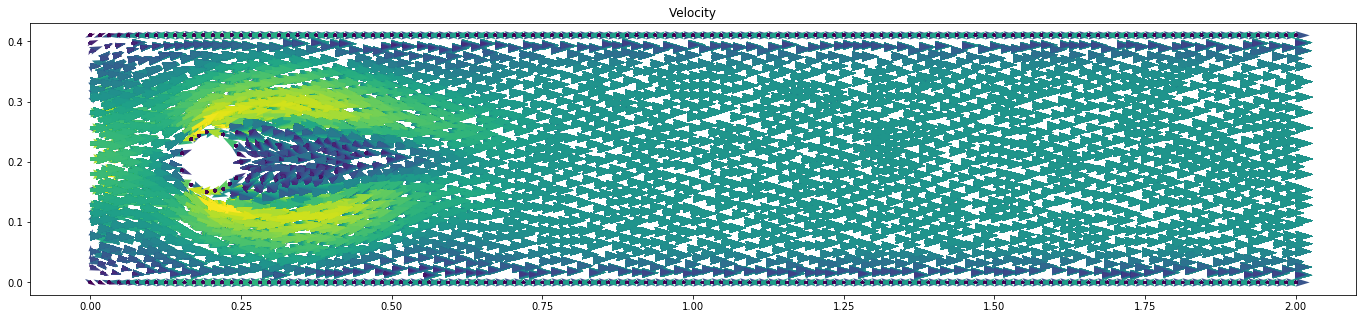

In [15]:
%matplotlib inline
from App.Sol import *
datos = Read(data)
Solution(datos, mesha['malla'], size=(40,5))

## __6. Simulación dinámica__

<div align="justify">
    A continuación, se puede apreciar una simulación dinámica del problema de interés.
</div>

In [16]:
%gui tk
from App.Sim import *
Simulation(datos)